# In this notebook we will train the random forest model

In [1]:
# ──────────────────── sweep_RF_baselines.py ───────────────────────────────
import warnings, numpy as np, pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
warnings.filterwarnings("ignore")

# ---------- ❶ parameters to sweep ----------
YEARS      = [2016,2018,2020,2022]          # add/remove years you have
HORIZONS   = [1, 2, 4, 12]               # hours
BIN_WIDTHS = [0.005, 0.01, 0.02]         # 0.5 %, 1 %, 2 %
TEST_SIZE  = 0.20
RAND_SEED  = 42
BASE_DIR   = Path(r"C:\Users\ADMIN\Desktop\Coding_projects\stock_market_prediction"
                  r"\Stock-Market-Prediction\data\processed")

RF_KWARGS  = dict(
    n_estimators = 200,
    max_depth    = None,
    max_features = "sqrt",
    class_weight = "balanced",
    n_jobs       = -1,
    random_state = RAND_SEED,
)

results = []

# ---------- ❷ sweep loops ----------
for yr in YEARS:
    file = BASE_DIR / f"gemini_btc_data_final_version_with_features_{yr}_final.csv"
    if not file.exists():
        print(f"⚠️  {file.name} not found – skipped")
        continue

    df = pd.read_csv(file, parse_dates=["date"]).sort_values("date")

    for H in HORIZONS:
        # label once per horizon, then reuse for the three bin widths
        df_h = df.copy()
        df_h["rel_ret"] = (df_h["close"].shift(-H) - df_h["close"]) / df_h["close"]

        for b in BIN_WIDTHS:
            bins = [-np.inf, -b, b, np.inf]
            df_lab = df_h.copy()
            df_lab["y"] = pd.cut(df_lab["rel_ret"], bins=bins,
                                 labels=False, right=False)
            df_lab.dropna(subset=["y"], inplace=True)

            X = df_lab.drop(columns=["date", "rel_ret", "y"])
            y = df_lab["y"].astype(int)

            split = int(len(df_lab) * (1 - TEST_SIZE))
            X_train, X_test = X.iloc[:split], X.iloc[split:]
            y_train, y_test = y.iloc[:split], y.iloc[split:]

            rf = RandomForestClassifier(**RF_KWARGS).fit(X_train, y_train)
            y_pred = rf.predict(X_test)

            p, r, f, _ = precision_recall_fscore_support(
                y_test, y_pred, average="macro", zero_division=0
            )

            results.append(dict(Year=yr, HorizonH=H, Bin=b,
                                Precision=round(p,3),
                                Recall=round(r,3),
                                F1=round(f,3),
                                Samples=len(df_lab)))

# ---------- ❸ summary table ----------
summary = (pd.DataFrame(results)
             .sort_values(["Year", "HorizonH", "Bin"])
             .reset_index(drop=True))
print("\n### Quick RF baseline results (macro-averaged) ###")
print(summary.to_markdown(index=False))



### Quick RF baseline results (macro-averaged) ###


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [2]:
print(summary.to_string(index=False))


 Year  HorizonH   Bin  Precision  Recall    F1  Samples
 2016         1 0.005      0.807   0.335 0.301    80654
 2016         1 0.010      0.315   0.333 0.324    80654
 2016         1 0.020      0.330   0.333 0.332    80654
 2016         2 0.005      0.425   0.338 0.287    80653
 2016         2 0.010      0.629   0.334 0.314    80653
 2016         2 0.020      0.325   0.333 0.329    80653
 2016         4 0.005      0.409   0.378 0.353    80651
 2016         4 0.010      0.414   0.334 0.297    80651
 2016         4 0.020      0.312   0.333 0.322    80651
 2016        12 0.005      0.395   0.374 0.339    80643
 2016        12 0.010      0.369   0.366 0.341    80643
 2016        12 0.020      0.396   0.335 0.305    80643
 2018         1 0.005      0.592   0.335 0.295    63355
 2018         1 0.010      0.311   0.333 0.322    63355
 2018         1 0.020      0.329   0.333 0.331    63355
 2018         2 0.005      0.448   0.339 0.282    63354
 2018         2 0.010      0.624   0.334 0.311  

### 📊 Quick RF Baseline Results (macro-averaged)

| Year | HorizonH |   Bin   | Precision | Recall |   F1   | Samples |
|------|----------|---------|-----------|--------|--------|---------|
| 2016 |        1 | 0.005   |     0.807 |  0.335 |  0.301 |   80654 |
| 2016 |        1 | 0.010   |     0.315 |  0.333 |  0.324 |   80654 |
| 2016 |        1 | 0.020   |     0.330 |  0.333 |  0.332 |   80654 |
| 2016 |        2 | 0.005   |     0.425 |  0.338 |  0.287 |   80653 |
| 2016 |        2 | 0.010   |     0.629 |  0.334 |  0.314 |   80653 |
| 2016 |        2 | 0.020   |     0.325 |  0.333 |  0.329 |   80653 |
| 2016 |        4 | 0.005   |     0.409 |  0.378 |  0.353 |   80651 |
| 2016 |        4 | 0.010   |     0.414 |  0.334 |  0.297 |   80651 |
| 2016 |        4 | 0.020   |     0.312 |  0.333 |  0.322 |   80651 |
| 2016 |       12 | 0.005   |     0.395 |  0.374 |  0.339 |   80643 |
| 2016 |       12 | 0.010   |     0.369 |  0.366 |  0.341 |   80643 |
| 2016 |       12 | 0.020   |     0.396 |  0.335 |  0.305 |   80643 |
| 2018 |        1 | 0.005   |     0.592 |  0.335 |  0.295 |   63355 |
| 2018 |        1 | 0.010   |     0.311 |  0.333 |  0.322 |   63355 |
| 2018 |        1 | 0.020   |     0.329 |  0.333 |  0.331 |   63355 |
| 2018 |        2 | 0.005   |     0.448 |  0.339 |  0.282 |   63354 |
| 2018 |        2 | 0.010   |     0.624 |  0.334 |  0.311 |   63354 |
| 2018 |        2 | 0.020   |     0.323 |  0.333 |  0.328 |   63354 |
| 2018 |        4 | 0.005   |     0.391 |  0.368 |  0.338 |   63352 |
| 2018 |        4 | 0.010   |     0.422 |  0.334 |  0.291 |   63352 |
| 2018 |        4 | 0.020   |     0.309 |  0.333 |  0.321 |   63352 |
| 2018 |       12 | 0.005   |     0.363 |  0.346 |  0.279 |   63344 |
| 2018 |       12 | 0.010   |     0.352 |  0.352 |  0.320 |   63344 |
| 2018 |       12 | 0.020   |     0.379 |  0.334 |  0.298 |   63344 |
| 2020 |        1 | 0.005   |     0.388 |  0.335 |  0.292 |   45874 |
| 2020 |        1 | 0.010   |     0.310 |  0.333 |  0.321 |   45874 |
| 2020 |        1 | 0.020   |     0.329 |  0.333 |  0.331 |   45874 |
| 2020 |        2 | 0.005   |     0.449 |  0.344 |  0.290 |   45873 |
| 2020 |        2 | 0.010   |     0.287 |  0.333 |  0.309 |   45873 |
| 2020 |        2 | 0.020   |     0.322 |  0.333 |  0.327 |   45873 |
| 2020 |        4 | 0.005   |     0.415 |  0.377 |  0.346 |   45871 |
| 2020 |        4 | 0.010   |     0.418 |  0.334 |  0.287 |   45871 |
| 2020 |        4 | 0.020   |     0.307 |  0.333 |  0.320 |   45871 |
| 2020 |       12 | 0.005   |     0.341 |  0.340 |  0.328 |   45863 |
| 2020 |       12 | 0.010   |     0.359 |  0.346 |  0.319 |   45863 |
| 2020 |       12 | 0.020   |     0.465 |  0.335 |  0.296 |   45863 |
| 2022 |        1 | 0.005   |     0.462 |  0.336 |  0.292 |   28340 |
| 2022 |        1 | 0.010   |     0.309 |  0.333 |  0.321 |   28340 |
| 2022 |        1 | 0.020   |     0.329 |  0.333 |  0.331 |   28340 |
| 2022 |        2 | 0.005   |     0.439 |  0.345 |  0.290 |   28339 |
| 2022 |        2 | 0.010   |     0.287 |  0.333 |  0.309 |   28339 |
| 2022 |        2 | 0.020   |     0.321 |  0.333 |  0.327 |   28339 |
| 2022 |        4 | 0.005   |     0.399 |  0.360 |  0.312 |   28337 |
| 2022 |        4 | 0.010   |     0.251 |  0.333 |  0.286 |   28337 |
| 2022 |        4 | 0.020   |     0.306 |  0.333 |  0.319 |   28337 |
| 2022 |       12 | 0.005   |     0.347 |  0.344 |  0.336 |   28329 |
| 2022 |       12 | 0.010   |     0.364 |  0.361 |  0.330 |   28329 |
| 2022 |       12 | 0.020   |     0.296 |  0.335 |  0.307 |   28329 |


In [ ]:
# ───────────────────────────── CONFIG & IMPORTS ─────────────────────────────
import warnings, shap, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import os

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # prevent GPU errors for SHAP

# ────────────────────────────── CONFIG  ─────────────────────────────────────
DATA_PATH = Path(r"C:\Users\ADMIN\Desktop\Coding_projects\stock_market_prediction\Stock-Market-Prediction\data\processed\gemini_btc_data_final_version_with_features_2016_final.csv")
HORIZON   = 4
BINS      = [-np.inf, -0.005, 0.005, np.inf]
TEST_SIZE = 0.2
RAND_SEED = 42

RF_KWARGS = dict(
    n_estimators = 200,
    max_depth    = None,
    max_features = "sqrt",
    class_weight = "balanced",
    n_jobs       = -1,
    random_state = RAND_SEED
)

# ─────────────────────── LOAD + LABEL ──────────────────────────────────────
df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date")
df["rel_ret"] = (df["close"].shift(-HORIZON) - df["close"]) / df["close"]
df["y"]       = pd.cut(df["rel_ret"], bins=BINS, labels=False, right=False)
df.dropna(subset=["y"], inplace=True)

# ─────────────────────── TRAIN/TEST SPLIT ──────────────────────────────────
X = df.drop(columns=["date", "rel_ret", "y"])
y = df["y"].astype(int)

split = int(len(df) * (1 - TEST_SIZE))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# ─────────────────────── MODEL SETUP + TRAIN ───────────────────────────────
num_cols = X_train.select_dtypes("number").columns
prep = ColumnTransformer([("num", "passthrough", num_cols)], remainder="drop", verbose_feature_names_out=False)]]

model = Pipeline([("prep", prep), ("rf", RandomForestClassifier(**RF_KWARGS))])
model.fit(X_train, y_train)

print("\n📊 Hold-out classification report:")
print(classification_report(y_test, model.predict(X_test), digits=3, zero_division=0))

# ─────────────────────── SHAP ON 200 SAMPLES PER YEAR ──────────────────────
df["year"] = df["date"].dt.year
sampled_df = pd.concat([
    df[df["year"] == year].sample(n=200, random_state=RAND_SEED)
    for year in df["year"].unique()
    if len(df[df["year"] == year]) >= 200
])

X_shap = sampled_df.drop(columns=["date", "rel_ret", "y", "year"])
prepped_X = model.named_steps["prep"].transform(X_shap)
rf_model  = model.named_steps["rf"]

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(prepped_X)

print(f"✅ SHAP input shape: {prepped_X.shape}, Classes: {len(shap_values)}")

# Summary plot — comment this if you don’t want graph immediately
shap.summary_plot(shap_values, features=X_shap, feature_names=num_cols.tolist())



📊 Hold-out classification report:
              precision    recall  f1-score   support

           0      0.276     0.238     0.256      3249
           1      0.609     0.840     0.706      9224
           2      0.341     0.057     0.098      3658

    accuracy                          0.541     16131
   macro avg      0.409     0.378     0.353     16131
weighted avg      0.481     0.541     0.478     16131




📊 20 % hold-out metrics:
              precision    recall  f1-score   support

           0      0.255     0.601     0.358      3249
           1      0.711     0.529     0.607      9224
           2      0.311     0.136     0.189      3658

    accuracy                          0.454     16131
   macro avg      0.426     0.422     0.385     16131
weighted avg      0.528     0.454     0.462     16131



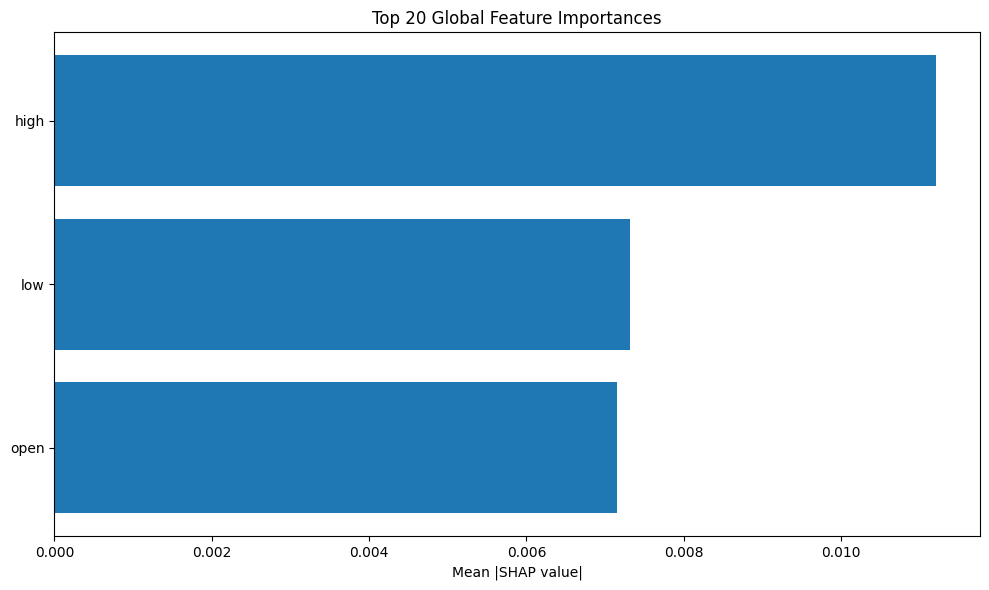

In [3]:
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import shap

warnings.filterwarnings("ignore")

# ╭─ CONFIG ─╮
DATA_PATH = Path(r"C:\Users\ADMIN\Desktop\Coding_projects\stock_market_prediction\Stock-Market-Prediction\data\processed\gemini_btc_data_final_version_with_features_2016_final.csv")
HORIZON = 4
BIN_WIDTH = 0.005
TEST_SIZE = 0.20
RAND_SEED = 42
MAX_TRAIN_ROWS = 100_000
SHAP_PER_YEAR = 120

RF_KWARGS = dict(
    n_estimators=100, max_depth=12, max_features="sqrt", class_weight="balanced",
    max_samples=0.6, n_jobs=-1, random_state=RAND_SEED
)

# ─── LOAD & LABEL ───
df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date")
if len(df) > MAX_TRAIN_ROWS:
    df = df.iloc[:: int(len(df) / MAX_TRAIN_ROWS)]

bins = [-np.inf, -BIN_WIDTH, BIN_WIDTH, np.inf]
df["rel_ret"] = (df["close"].shift(-HORIZON) - df["close"]) / df["close"]
df["y"] = pd.cut(df["rel_ret"], bins=bins, labels=False, right=False)
df.dropna(subset=["y"], inplace=True)

X = df.drop(columns=["date", "rel_ret", "y"])
y = df["y"].astype(int)

split = int(len(df) * (1 - TEST_SIZE))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# ─── PIPELINE ───
num_cols = X_train.select_dtypes("number").columns
prep = ColumnTransformer([("num", "passthrough", num_cols)], remainder="drop", verbose_feature_names_out=False)
model = Pipeline([("prep", prep), ("rf", RandomForestClassifier(**RF_KWARGS))])
model.fit(X_train, y_train)

print("\n📊 20 % hold-out metrics:")
print(classification_report(y_test, model.predict(X_test), digits=3, zero_division=0))

# ─── LIGHT SHAP SAMPLE ───
df["year"] = df["date"].dt.year
df["y_lbl"] = y
samples = []
for yr, g in df.groupby("year", observed=True):
    n = min(SHAP_PER_YEAR, len(g))
    g_sample = (g.groupby("y_lbl", group_keys=False, observed=True)
                  .apply(lambda d: resample(d, n_samples=int(n * len(d) / len(g)),
                                            replace=False, random_state=RAND_SEED)))
    samples.append(g_sample)

X_shap_df = pd.concat(samples).drop(columns=["date", "rel_ret", "y_lbl", "year"])
prepped_X = model.named_steps["prep"].transform(X_shap_df)

feat_names = model.named_steps["prep"].get_feature_names_out()
rf_model = model.named_steps["rf"]

# Force CPU-only SHAP explainability
explainer = shap.TreeExplainer(rf_model, feature_perturbation="tree_path_dependent", approximate=True)
shap_list = explainer.shap_values(prepped_X, check_additivity=False)

# ─── GLOBAL IMPORTANCE BAR PLOT ───
mean_abs = np.mean([np.abs(s) for s in shap_list], axis=0)
global_importance = np.mean(mean_abs, axis=0)
sorted_idx = np.argsort(global_importance)[::-1]
sorted_names = np.array(feat_names)[sorted_idx]
sorted_values = global_importance[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_names[:20][::-1], sorted_values[:20][::-1])
plt.xlabel("Mean |SHAP value|")
plt.title("Top 20 Global Feature Importances")
plt.tight_layout()
plt.show()


In [9]:
# ───────────────────── CONFIG ──────────────────────
from pathlib import Path
import warnings, numpy as np, pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.inspection import permutation_importance

DATA_PATH  = Path(r"C:\Users\ADMIN\Desktop\Coding_projects\stock_market_prediction"
                  r"\Stock-Market-Prediction\data\processed"
                  r"\gemini_btc_data_final_version_with_features_2016_final.csv")

HORIZON    = 4                        # hours forward you want to predict
BINS       = [-np.inf, -0.005, 0.005, np.inf]   # three-way ↓ / flat / ↑
TEST_SIZE  = 0.20                     # last 20 % = test
RAND_SEED  = 42

RF_PARAMS  = dict(                    # quick but decent forest
    n_estimators = 300,
    max_depth    = None,
    max_features = "sqrt",
    class_weight = "balanced",
    n_jobs       = -1,
    random_state = RAND_SEED,
)
# ───────────────────── LOAD & LABEL ──────────────────────
warnings.filterwarnings("ignore")

df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date")
df["rel_ret"] = (df["close"].shift(-HORIZON) - df["close"]) / df["close"]
df["y"]       = pd.cut(df["rel_ret"], bins=BINS, labels=False, right=False)
df.dropna(subset=["y"], inplace=True)

X = df.drop(columns=["date", "rel_ret", "y"])
y = df["y"].astype(int)

# ───────────────────── CHRONOLOGICAL SPLIT ──────────────
split = int(len(df) * (1 - TEST_SIZE))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# ───────────────────── TRAIN & REPORT ───────────────────
rf = RandomForestClassifier(**RF_PARAMS)
rf.fit(X_train, y_train)

print(f"\n📊  Hold-out ({int(TEST_SIZE*100)} %) macro report:")
print(classification_report(y_test, rf.predict(X_test),
                            digits=3, zero_division=0))

# ───────────────────── FEATURE IMPORTANCE ───────────────
feat_names = X.columns.tolist()

# 1) Gini / impurity importance
gini_imp = (pd.DataFrame({"Feature": feat_names,
                          "Gini_score": rf.feature_importances_})
              .sort_values("Gini_score", ascending=False)
              .reset_index(drop=True))
gini_imp["Gini rank"] = np.arange(1, len(gini_imp)+1)

# 2) Permutation importance (macro-F1 drop)
perm = permutation_importance(
           rf, X_test, y_test,
           scoring=make_scorer(f1_score, average="macro"),
           n_repeats=5, random_state=RAND_SEED, n_jobs=-1)
perm_imp = (pd.DataFrame({"Feature": feat_names,
                          "Perm_score": perm.importances_mean})
              .sort_values("Perm_score", ascending=False)
              .reset_index(drop=True))
perm_imp["Perm rank"] = np.arange(1, len(perm_imp)+1)

# 3) Merge the two views into one dashboard
full_imp = (gini_imp.merge(perm_imp, on="Feature", how="outer")
                     .loc[:, ["Feature",
                              "Gini rank", "Gini_score",
                              "Perm rank", "Perm_score"]]
                     .sort_values("Perm rank")
                     .reset_index(drop=True))

# ───────────────────── DISPLAY ALL FEATURES ─────────────
pd.set_option("display.max_rows", None,
              "display.float_format", lambda v: f"{v:10.4g}")
print("\n🔍 Combined importance ranking (every feature):")
print(full_imp.to_string(index=False))



📊  Hold-out (20 %) macro report:
              precision    recall  f1-score   support

           0      0.273     0.226     0.247      3249
           1      0.608     0.848     0.708      9224
           2      0.340     0.053     0.091      3658

    accuracy                          0.542     16131
   macro avg      0.407     0.376     0.349     16131
weighted avg      0.480     0.542     0.475     16131


🔍 Combined importance ranking (every feature):
         Feature  Gini rank  Gini_score  Perm rank  Perm_score
              tr          4     0.05405          1      0.0242
          atr_14          3     0.05884          2     0.02261
      Volume BTC          5     0.05348          3     0.02009
            high         17     0.04176          4     0.01238
      band_width          1     0.06914          5    0.009333
price_above_ma50          6     0.04952          6    0.007758
           close         15     0.04243          7    0.007549
             low         19     0

In [10]:
# ───────────────────── CONFIG ──────────────────────
from pathlib import Path
import warnings, numpy as np, pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.inspection import permutation_importance

DATA_PATH  = Path(r"C:\Users\ADMIN\Desktop\Coding_projects\stock_market_prediction"
                  r"\Stock-Market-Prediction\data\processed"
                  r"\gemini_btc_data_final_version_with_features_2016_final.csv")

HORIZON    = 4                        # hours forward you want to predict
BINS       = [-np.inf, -0.005, 0.005, np.inf]   # three-way ↓ / flat / ↑
TEST_SIZE  = 0.20                     # last 20 % = test
RAND_SEED  = 42

RF_PARAMS  = dict(
    n_estimators = 300,
    max_depth    = None,
    max_features = "sqrt",
    class_weight = "balanced",
    n_jobs       = -1,
    random_state = RAND_SEED,
)

# ───────────────────── LOAD & LABEL ──────────────────────
warnings.filterwarnings("ignore")

df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date")
df["rel_ret"] = (df["close"].shift(-HORIZON) - df["close"]) / df["close"]
df["y"]       = pd.cut(df["rel_ret"], bins=BINS, labels=False, right=False)
df.dropna(subset=["y"], inplace=True)

# Drop open, high, low
drop_cols = ["date", "rel_ret", "y", "open", "high", "low"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df["y"].astype(int)

# ───────────────────── CHRONOLOGICAL SPLIT ──────────────
split = int(len(df) * (1 - TEST_SIZE))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# ───────────────────── TRAIN & REPORT ───────────────────
rf = RandomForestClassifier(**RF_PARAMS)
rf.fit(X_train, y_train)

print(f"\n📊  Hold-out ({int(TEST_SIZE*100)} %) macro report:")
print(classification_report(y_test, rf.predict(X_test),
                            digits=3, zero_division=0))

# ───────────────────── FEATURE IMPORTANCE ───────────────
feat_names = X.columns.tolist()

# 1) Gini importance
gini_imp = (pd.DataFrame({"Feature": feat_names,
                          "Gini_score": rf.feature_importances_})
              .sort_values("Gini_score", ascending=False)
              .reset_index(drop=True))
gini_imp["Gini rank"] = np.arange(1, len(gini_imp)+1)

# 2) Permutation importance
perm = permutation_importance(
           rf, X_test, y_test,
           scoring=make_scorer(f1_score, average="macro"),
           n_repeats=5, random_state=RAND_SEED, n_jobs=-1)
perm_imp = (pd.DataFrame({"Feature": feat_names,
                          "Perm_score": perm.importances_mean})
              .sort_values("Perm_score", ascending=False)
              .reset_index(drop=True))
perm_imp["Perm rank"] = np.arange(1, len(perm_imp)+1)

# 3) Combine
full_imp = (gini_imp.merge(perm_imp, on="Feature", how="outer")
                     .loc[:, ["Feature",
                              "Gini rank", "Gini_score",
                              "Perm rank", "Perm_score"]]
                     .sort_values("Perm rank")
                     .reset_index(drop=True))

# ───────────────────── DISPLAY ALL FEATURES ─────────────
pd.set_option("display.max_rows", None,
              "display.float_format", lambda v: f"{v:10.4g}")
print("\n🔍 Combined importance ranking (every feature):")
print(full_imp.to_string(index=False))



📊  Hold-out (20 %) macro report:
              precision    recall  f1-score   support

           0      0.264     0.153     0.193      3249
           1      0.602     0.887     0.717      9224
           2      0.382     0.068     0.115      3658

    accuracy                          0.554     16131
   macro avg      0.416     0.369     0.342     16131
weighted avg      0.484     0.554     0.475     16131


🔍 Combined importance ranking (every feature):
         Feature  Gini rank  Gini_score  Perm rank  Perm_score
              tr          5     0.06028          1     0.02796
          atr_14          4     0.06411          2     0.02354
      Volume BTC          6      0.0599          3     0.02294
      band_width          1      0.0772          4      0.0204
     macd_signal         11     0.05187          5     0.01058
price_above_ma50          7     0.05632          6     0.01048
          boll_b         16     0.04646          7    0.008672
          roc_4h         14     0

In [8]:
# Check what SHAP actually returned
print(f"\n👀 SHAP list shape(s): {[np.array(s).shape for s in shap_list]}")

# Case 1: SHAP returned per-class arrays (expected shape: list of (n_samples, n_features))
if isinstance(shap_list, list) and len(shap_list) == 3 and shap_list[0].ndim == 2:
    class_contributions = {
        f"Class_{i}": np.mean(np.abs(shap_list[i]), axis=0)
        for i in range(len(shap_list))
    }

    # Combine into a single DataFrame
    contrib_df = pd.DataFrame(class_contributions, index=feat_names)
    contrib_df["Global_Mean"] = contrib_df.mean(axis=1)
    contrib_df = contrib_df.sort_values("Global_Mean", ascending=False)

    print("\n🔍 Top 15 Features by Class-wise SHAP Contributions:")
    print(contrib_df.head(15).round(5))

# Case 2: SHAP returned a single 2D array (e.g., binary classification)
elif isinstance(shap_list, np.ndarray) and shap_list.ndim == 2:
    global_contrib = np.mean(np.abs(shap_list), axis=0)
    contrib_df = pd.DataFrame({
        "Feature": feat_names,
        "Mean |SHAP|": global_contrib
    }).sort_values("Mean |SHAP|", ascending=False)

    print("\n🔍 SHAP Feature Importance (Binary classification):")
    print(contrib_df.head(15).round(5))

else:
    print("❌ Unexpected SHAP format. Check shape of shap_list.")



👀 SHAP list shape(s): [(21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21, 3), (21,

In [ ]:
from sklearn.experimental import enable_halving_search_cv   # noqa: E402  ★ add
from sklearn.model_selection import HalvingRandomSearchCV   # now import works
import numpy as np, pandas as pd, joblib, warnings
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import HalvingRandomSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, f1_score, classification_report

warnings.filterwarnings("ignore")

# ─── CONFIG ────────────────────────────────────────────────
DATA_PATH   = Path(r"...\gemini_btc_data_final_version_with_features_2018.csv")
HORIZON     = 4
BINS        = [-np.inf, -0.005, 0.005, np.inf]
RAND_SEED   = 42
MODEL_FILE  = "rf_btc_classifier.joblib"

# ─── LOAD & LABEL (leak-free) ─────────────────────────────
df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date")
df["rel_ret"] = (df["close"].shift(-HORIZON) - df["close"]) / df["close"]
df["y"] = pd.cut(df["rel_ret"], bins=BINS, labels=False, right=False)
df.dropna(subset=["y"], inplace=True)

X_all = df.drop(columns=["date", "rel_ret", "y"])
y_all = df["y"].astype(int)

# ─── ⇣⇣⇣  *make the split first*  ⇣⇣⇣ ─────────────────────
split = int(len(df) * 0.8)
X_train, X_test = X_all.iloc[:split], X_all.iloc[split:]
y_train, y_test = y_all.iloc[:split], y_all.iloc[split:]

num_cols = X_train.select_dtypes("number").columns
pre = ColumnTransformer(
        [("num", "passthrough", num_cols)],
        remainder="drop",
        verbose_feature_names_out=False)

# start with a tiny forest for the race
rf_base = RandomForestClassifier(
            n_estimators=50,        # sets min_resources
            n_jobs=-1, random_state=RAND_SEED)

pipe = Pipeline([("prep", pre), ("rf", rf_base)])

# ─── SUCCESSIVE-HALVING SEARCH ───────────────────────────
param_dist = {
    "rf__max_depth":      [None, 6, 12, 24],
    "rf__class_weight":   ["balanced", "balanced_subsample"],
    "rf__max_features":   ["sqrt", 0.3, 0.6],
}

cv = TimeSeriesSplit(n_splits=3)

search = HalvingRandomSearchCV(
            pipe, param_dist,
            resource="rf__n_estimators", max_resources=600, factor=3,
            scoring=make_scorer(f1_score, average="macro"),
            cv=cv, random_state=RAND_SEED,
            n_jobs=-1, verbose=1)

search.fit(X_train, y_train)
print(f"Best CV macro-F1 : {search.best_score_:.3f}")
best = search.best_params_

# ─── FINAL REFIT on TRAIN only ────────────────────────────
best_core = {k.split("__", 1)[1]: v for k, v in best.items()}
best_core["n_estimators"] = 1000      # upscale forest

final_model = Pipeline([
    ("prep", pre),
    ("rf", RandomForestClassifier(**best_core,
                                  n_jobs=-1, random_state=RAND_SEED))
]).fit(X_train, y_train)

joblib.dump(final_model, MODEL_FILE)
print("Model saved →", MODEL_FILE)

# ─── Hold-out report (never seen in tuning) ───────────────
print("\nHold-out 20 % report:")
print(classification_report(y_test,
                            final_model.predict(X_test),
                            digits=3, zero_division=0))